In [ ]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap,ListedColormap
import matplotlib.cm as cm
import pandas as pd
import numpy as np

In [646]:
#regression in US level

dict_state={'1': 'AL', '2': 'AK', '4': 'AZ', '5': 'AR', '6': 'CA', '8': 'CO', '9': 'CT', '10': 'DE', '11': 'DC', '12': 'FL',
            '13': 'GA', '15': 'HI', '16': 'ID','17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', 
            '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO','30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', 
            '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA','44': 'RI', 
            '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', 
            '56': 'WY', '60': 'AS', '66': 'GU', '69': 'MP', '72': 'PR', '74': 'UM', '78': 'VI'}

def class_sig(pv):
    if pv<0.001:
        return '***'
    elif pv<0.01:
        return '**'
    elif pv<0.05:
        return '*'
    else:
        return 'not significant' 

listControl=['census_block_group','state','median_income_normalized by 250000','percent_undergraduate or higher','percent_minority']
df_contr=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/new data/census/all_census_data_with_location.csv',
                     usecols=listControl)


homoRegResultCountry=[]
heteRegResultCountry=[]

NaRegListCountry=[]

col=['census_block_group','ParentType','num_accessible_facility','demand_ratios','demand_met_in_local','age']

listParentType=['Health Care Services',
                 'Pharmaceutical and Medical Supply Stores',
                 'Grocery and Food Supply',
                 'Social Assistance',
                 'Transportation Services',
                 'Home Health Care Services',
                 'Financial Services',
                 'Legal Services',
                 'Housing and Real Estate',
                 'Personal Care Services',
                 'Utility Services',
                 'Retail Stores for Basic Needs']




for key in ['Health Care Services','Grocery and Food Supply','Housing and Real Estate']:#listParentType: 
    
    homoPath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/homo_supply_demand/'+key+'.csv'

    dfHomo=pd.read_csv(homoPath,usecols=col)

    
    dfHomo['dum_age']=dfHomo.apply(lambda x: 1 if x.age=='greater than 0.5' else 0,axis=1)

    
    dfHomo=pd.merge(dfHomo,df_contr,how='left',on='census_block_group')

    
    dfHomo['census_block_group']=dfHomo['census_block_group'].astype(str)

           
    dfHomo['state']=dfHomo.apply(lambda x: int(x['census_block_group'][0:2]) if len(x['census_block_group'])==12 else 
                                int(x['census_block_group'][0:1]), axis=1 )
    

    

    #homo
    df_reg=dfHomo[(dfHomo['demand_met_in_local']<=1)&(dfHomo['median_income_normalized by 250000']<=1.0005)&
                      (dfHomo['percent_undergraduate or higher']<=1)&(dfHomo['percent_minority']<=1)]
    num_obs=len(df_reg)
        
    num_old_obs=sum(df_reg['dum_age'])
    if (num_obs>0) &(num_old_obs>0):

        y=df_reg.loc[:,['demand_met_in_local']]

        
        #reg4 add state 
        reg4_X=['dum_age','demand_ratios',
                       'median_income_normalized by 250000','percent_undergraduate or higher','percent_minority','state']

                
        x4=df_reg.loc[:,reg4_X]
        x4=sm.add_constant(x4)
        model4=sm.OLS(y,x4).fit()   
        
        print(model4.summary())
        
        #reg without dum_age add state 

        reg0_X=['demand_ratios',
                       'median_income_normalized by 250000','percent_undergraduate or higher','percent_minority','state']

                
        x0=df_reg.loc[:,reg0_X]
        x0=sm.add_constant(x0)
        model0=sm.OLS(y,x0).fit() 
        
        print(key)
        #print(model0.summary())

                             OLS Regression Results                            
Dep. Variable:     demand_met_in_local   R-squared:                       0.070
Model:                             OLS   Adj. R-squared:                  0.070
Method:                  Least Squares   F-statistic:                     2671.
Date:                 Sat, 04 May 2024   Prob (F-statistic):               0.00
Time:                         22:02:44   Log-Likelihood:                -21827.
No. Observations:               212436   AIC:                         4.367e+04
Df Residuals:                   212429   BIC:                         4.374e+04
Df Model:                            6                                         
Covariance Type:             nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [8]:
#regression in state-level

dict_epsg={'1': '32616', '2': '32606', '4': '32612', '5': '32615', '6': '32611', '8': '32613', '9': '32618', '10': '32618', '11': '32618', '12': '32617', 
           '13': '32616', '15': '32604', '16': '32611', '17': '32616', '18': '32616', '19': '32615', '20': '32614', '21': '32616', '22': '32615', '23': '32619', 
           '24': '32618', '25': '32619', '26': '32617', '27': '32615', '28': '32616', '29': '32615', '30': '32612', '31': '32614', '32': '32611', '33': '32619', 
           '34': '32618', '35': '32613', '36': '32618', '37': '32617', '38': '32614', '39': '32617', '40': '32614', '41': '32610', '42': '32618', '44': '32619', 
           '45': '32617', '46': '32614', '47': '32616', '48': '32614', '49': '32612', '50': '32618', '51': '32618', '53': '32610', '54': '32617', '55': '32616', 
           '56': '32613', '72': '32619'}
dict_state={'1': 'AL', '2': 'AK', '4': 'AZ', '5': 'AR', '6': 'CA', '8': 'CO', '9': 'CT', '10': 'DE', '11': 'DC', '12': 'FL', '13': 'GA', '15': 'HI', '16': 'ID',
            '17': 'IL', '18': 'IN', '19': 'IA', '20': 'KS', '21': 'KY', '22': 'LA', '23': 'ME', '24': 'MD', '25': 'MA', '26': 'MI', '27': 'MN', '28': 'MS', '29': 'MO',
            '30': 'MT', '31': 'NE', '32': 'NV', '33': 'NH', '34': 'NJ', '35': 'NM', '36': 'NY', '37': 'NC', '38': 'ND', '39': 'OH', '40': 'OK', '41': 'OR', '42': 'PA', 
            '44': 'RI', '45': 'SC', '46': 'SD', '47': 'TN', '48': 'TX', '49': 'UT', '50': 'VT', '51': 'VA', '53': 'WA', '54': 'WV', '55': 'WI', '56': 'WY', '60': 'AS', 
            '66': 'GU', '69': 'MP', '72': 'PR', '74': 'UM', '78': 'VI'}

import statsmodels.api as sm
import pandas as pd

def class_sig(pv):
    if pv<0.001:
        return '***'
    elif pv<0.01:
        return '**'
    elif pv<0.05:
        return '*'
    else:
        return 'not significant' 

listControl=['census_block_group','state','median_income_normalized by 250000','percent_undergraduate or higher','percent_minority']
df_contr=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/new data/census/all_census_data_with_location.csv',
                     usecols=listControl)


homoRegResult=[]
#heteRegResult=[]

NaRegList=[]

col=['census_block_group','ParentType','num_accessible_facility','demand_ratios','demand_met_in_local','age']

listParentType=['Health Care Services',
                 'Pharmaceutical and Medical Supply Stores',
                 'Grocery and Food Supply',
                 'Social Assistance',
                 'Transportation Services',
                 'Home Health Care Services',
                 'Financial Services',
                 'Legal Services',
                 'Housing and Real Estate',
                 'Personal Care Services',
                 'Utility Services',
                 'Retail Stores for Basic Needs']
listHGH=['Health Care Services',
                 'Grocery and Food Supply',
                 'Housing and Real Estate']

for key in listHGH: 
    
    homoPath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/homo_supply_demand/'+key+'.csv'
    #hetePath='D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/hete_supply_demand/'+key+'.csv'
    dfHomo=pd.read_csv(homoPath,usecols=col)
    #dfHete=pd.read_csv(hetePath,usecols=col)
    
    dfHomo['dum_age']=dfHomo.apply(lambda x: 1 if x.age=='greater than 0.5' else 0,axis=1)
    #dfHete['dum_age']=dfHete.apply(lambda x: 1 if x.age=='greater than 0.5' else 0,axis=1)
    
    dfHomo=pd.merge(dfHomo,df_contr,how='left',on='census_block_group')
    #dfHete=pd.merge(dfHete,df_contr,how='left',on='census_block_group')
    print('read data_'+key)
    
    for fip in dict_epsg.keys():
        state=dict_state[fip]
        print(len(dfHomo[dfHomo['state']==int(fip)]),state)
        #homo
        df_reg=dfHomo[(dfHomo['state']==int(fip))&(dfHomo['demand_met_in_local']<=1)&(dfHomo['median_income_normalized by 250000']<=1.0005)&
                          (dfHomo['percent_undergraduate or higher']<=1)&(dfHomo['percent_minority']<=1)]
        num_obs=len(df_reg)
        
        num_old_obs=sum(df_reg['dum_age'])
        if (num_obs>0) &(num_old_obs>0):

            y=df_reg.loc[:,['demand_met_in_local']]
           # #reg1
           # x1=df_reg.loc[:,['dum_age']]
           # x1=sm.add_constant(x1)
           # model1=sm.OLS(y,x1).fit()

           # #reg2 add controls
           # x2=df_reg.loc[:,['dum_age','median_income_normalized by 250000','percent_undergraduate or higher','percent_minority']]
          # x2=sm.add_constant(x2)
          #  model2=sm.OLS(y,x2).fit()

            #reg3 add demand ratios
            x3=df_reg.loc[:,['dum_age','demand_ratios','median_income_normalized by 250000','percent_undergraduate or higher','percent_minority']]
            x3=sm.add_constant(x3)
            model3=sm.OLS(y,x3).fit()

            homoRegResult.append((key,state,num_obs,num_old_obs,
                               model3.params[1],class_sig(model3.pvalues[1]),
                                 model3.conf_int()[0][1],model3.conf_int()[1][1]
                                 ))
        else:
            NaRegList.append((key,state,num_obs,num_old_obs,'homo5miles'))
        
        print(state+'_'+key+'_homo done')
        
        
      #  #hete
      #  df_reg=dfHete[(dfHete['state']==int(fip))&(dfHete['demand_met_in_local']<=1)&(dfHete['median_income_normalized by 250000']<=1.0005)&
      #            (dfHete['percent_undergraduate or higher']<=1)&(dfHete['percent_minority']<=1)]
      #  num_obs=len(df_reg)
        
      #  num_old_obs=sum(df_reg['dum_age'])
        
      #  if (num_obs>0) &(num_old_obs>0):
            
      #      y=df_reg.loc[:,['demand_met_in_local']]
            ##reg1
            #x1=df_reg.loc[:,['dum_age']]
            #x1=sm.add_constant(x1)
            #model1=sm.OLS(y,x1).fit()

            ##reg2 add controls
            #x2=df_reg.loc[:,['dum_age','median_income_normalized by 250000','percent_undergraduate or higher','percent_minority']]
            #x2=sm.add_constant(x2)
           # model2=sm.OLS(y,x2).fit()

            #reg3 add demand ratios
       #     x3=df_reg.loc[:,['dum_age','demand_ratios','median_income_normalized by 250000','percent_undergraduate or higher','percent_minority']]
        #    x3=sm.add_constant(x3)
       #     model3=sm.OLS(y,x3).fit()


       #     heteRegResult.append((key,state,num_obs,num_old_obs,
       #                        model1.params[1],class_sig(model1.pvalues[1]),
       #                        model2.params[1],class_sig(model2.pvalues[1]),
       #                        model3.params[1],class_sig(model3.pvalues[1])))
      #  else:
       #     NaRegList.append((key,state,num_obs,num_old_obs,'hete10miles'))
       #     
      #  print(state+'_'+key+'_hete done')

dfHomoRegResultPa=pd.DataFrame(homoRegResult,columns=['ParentType','state','num_obs','num_old_obs',
                                                                                   'coeff_regC_4_ctrls','signif_regC',
                                                     'coeff_lowci','coeff_upperci']) 
    
#dfHomoRegResultPa=pd.DataFrame(homoRegResult,columns=['ParentType','state','num_obs','num_old_obs','coeff_regA_0_ctrl','signif_regA',
#                                                                                   'coeff_regB_3_ctrls','signif_regB',
#                                                                                   'coeff_regC_4_ctrls','signif_regC']) 

#dfHeteRegResultPa=pd.DataFrame(heteRegResult,columns=['ParentType','state','num_obs','num_old_obs','coeff_regA_0_ctrl','signif_regA',
#                                                                                   'coeff_regB_3_ctrls','signif_regB',
#                                                                                   'coeff_regC_4_ctrls','signif_regC']) 

dfNaRegListPa=pd.DataFrame(NaRegList,columns=['ParentType','state','num_obs','num_old_obs','dtype']) 


read data_Health Care Services
3438 AL
AL_Health Care Services_homo done
534 AK
AK_Health Care Services_homo done
4178 AZ
AZ_Health Care Services_homo done
2147 AR
AR_Health Care Services_homo done
23212 CA
CA_Health Care Services_homo done
3532 CO
CO_Health Care Services_homo done
2585 CT
CT_Health Care Services_homo done
574 DE
DE_Health Care Services_homo done
450 DC
DC_Health Care Services_homo done
11442 FL
FL_Health Care Services_homo done
5533 GA
GA_Health Care Services_homo done
875 HI
HI_Health Care Services_homo done
963 ID
ID_Health Care Services_homo done
9691 IL
IL_Health Care Services_homo done
4814 IN
IN_Health Care Services_homo done
2630 IA
IA_Health Care Services_homo done
2351 KS
KS_Health Care Services_homo done
3285 KY
KY_Health Care Services_homo done
3471 LA
LA_Health Care Services_homo done
1086 ME
ME_Health Care Services_homo done
3926 MD
MD_Health Care Services_homo done
4985 MA
MA_Health Care Services_homo done
8205 MI
MI_Health Care Services_homo done
4111 M

C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

1449 NM
NM_Health Care Services_homo done
15463 NY
NY_Health Care Services_homo done
6155 NC
NC_Health Care Services_homo done
572 ND
ND_Health Care Services_homo done
9238 OH
OH_Health Care Services_homo done
2965 OK
OK_Health Care Services_homo done
2634 OR
OR_Health Care Services_homo done
9740 PA
PA_Health Care Services_homo done
815 RI
RI_Health Care Services_homo done
3059 SC
SC_Health Care Services_homo done
654 SD
SD_Health Care Services_homo done
4125 TN
TN_Health Care Services_homo done
15811 TX
TX_Health Care Services_homo done
1690 UT
UT_Health Care Services_homo done
522 VT
VT_Health Care Services_homo done
5332 VA
VA_Health Care Services_homo done
4783 WA
WA_Health Care Services_homo done
1592 WV
WV_Health Care Services_homo done
4489 WI
WI_Health Care Services_homo done
410 WY
WY_Health Care Services_homo done
2594 PR
PR_Health Care Services_homo done


C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

read data_Grocery and Food Supply
3438 AL
AL_Grocery and Food Supply_homo done
534 AK
AK_Grocery and Food Supply_homo done
4178 AZ
AZ_Grocery and Food Supply_homo done
2147 AR
AR_Grocery and Food Supply_homo done
23212 CA
CA_Grocery and Food Supply_homo done
3532 CO
CO_Grocery and Food Supply_homo done
2585 CT
CT_Grocery and Food Supply_homo done
574 DE
DE_Grocery and Food Supply_homo done
450 DC
DC_Grocery and Food Supply_homo done
11442 FL
FL_Grocery and Food Supply_homo done
5533 GA
GA_Grocery and Food Supply_homo done
875 HI
HI_Grocery and Food Supply_homo done
963 ID
ID_Grocery and Food Supply_homo done
9691 IL
IL_Grocery and Food Supply_homo done
4814 IN
IN_Grocery and Food Supply_homo done
2630 IA
IA_Grocery and Food Supply_homo done
2351 KS
KS_Grocery and Food Supply_homo done
3285 KY
KY_Grocery and Food Supply_homo done
3471 LA
LA_Grocery and Food Supply_homo done
1086 ME
ME_Grocery and Food Supply_homo done
3926 MD
MD_Grocery and Food Supply_homo done
4985 MA
MA_Grocery and F

C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

NY_Grocery and Food Supply_homo done
6155 NC
NC_Grocery and Food Supply_homo done
572 ND
ND_Grocery and Food Supply_homo done
9238 OH
OH_Grocery and Food Supply_homo done
2965 OK
OK_Grocery and Food Supply_homo done
2634 OR
OR_Grocery and Food Supply_homo done
9740 PA
PA_Grocery and Food Supply_homo done
815 RI
RI_Grocery and Food Supply_homo done
3059 SC
SC_Grocery and Food Supply_homo done
654 SD
SD_Grocery and Food Supply_homo done
4125 TN
TN_Grocery and Food Supply_homo done
15811 TX
TX_Grocery and Food Supply_homo done
1690 UT
UT_Grocery and Food Supply_homo done
522 VT
VT_Grocery and Food Supply_homo done
5332 VA
VA_Grocery and Food Supply_homo done
4783 WA
WA_Grocery and Food Supply_homo done
1592 WV
WV_Grocery and Food Supply_homo done
4489 WI
WI_Grocery and Food Supply_homo done
410 WY
WY_Grocery and Food Supply_homo done
2594 PR
PR_Grocery and Food Supply_homo done
read data_Housing and Real Estate
3438 AL
AL_Housing and Real Estate_homo done
534 AK
AK_Housing and Real Estate

C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

NY_Housing and Real Estate_homo done
6155 NC
NC_Housing and Real Estate_homo done
572 ND
ND_Housing and Real Estate_homo done
9238 OH
OH_Housing and Real Estate_homo done
2965 OK
OK_Housing and Real Estate_homo done
2634 OR
OR_Housing and Real Estate_homo done
9740 PA
PA_Housing and Real Estate_homo done
815 RI
RI_Housing and Real Estate_homo done
3059 SC
SC_Housing and Real Estate_homo done
654 SD
SD_Housing and Real Estate_homo done
4125 TN
TN_Housing and Real Estate_homo done
15811 TX
TX_Housing and Real Estate_homo done
1690 UT
UT_Housing and Real Estate_homo done
522 VT
VT_Housing and Real Estate_homo done
5332 VA
VA_Housing and Real Estate_homo done
4783 WA
WA_Housing and Real Estate_homo done
1592 WV
WV_Housing and Real Estate_homo done
4489 WI
WI_Housing and Real Estate_homo done
410 WY
WY_Housing and Real Estate_homo done
2594 PR
PR_Housing and Real Estate_homo done


C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:98: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  model3.params[1],class_sig(model3.pvalues[1]),
C:\Users\Linao\AppData\Local\Temp\ipykernel_24992\2449145157.py:99: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  

In [9]:
dfHomoRegResultPa

,ParentType,state,num_obs,num_old_obs,coeff_regC_4_ctrls,signif_regC,coeff_lowci,coeff_upperci
0,Health Care Services,AL,3322,9,0.202435,*,0.019777,0.385093
1,Health Care Services,AZ,4074,273,-0.005103,not significant,-0.037638,0.027432
2,Health Care Services,AR,2083,13,0.116626,not significant,-0.038600,0.271852
3,Health Care Services,CA,22488,204,0.009012,not significant,-0.023864,0.041888
4,Health Care Services,CO,3448,17,0.151823,*,0.028674,0.274971
...,...,...,...,...,...,...,...,...
135,Housing and Real Estate,VA,5178,32,0.131750,**,0.047478,0.216021
136,Housing and Real Estate,WA,4675,31,0.159487,***,0.069373,0.249600
137,Housing and Real Estate,WV,1537,4,0.070308,not significant,-0.159655,0.300271
138,Housing and Real Estate,WI,4414,10,0.165077,not significant,-0.006544,0.336699


In [11]:
dfHomoRegResultPa.to_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/HomoRegResult_with_CI.csv')

In [18]:
lowOldNum=35 #requiring at least 30 old_obs
parentType='Health Care Services'

#5 miles
dfHomoRegResultPa[(dfHomoRegResultPa['num_old_obs']>=lowOldNum)&(dfHomoRegResultPa['ParentType']==parentType)]

,ParentType,state,num_obs,num_old_obs,coeff_regC_4_ctrls,signif_regC,coeff_lowci,coeff_upperci
1,Health Care Services,AZ,4074,273,-0.005103,not significant,-0.037638,0.027432
3,Health Care Services,CA,22488,204,0.009012,not significant,-0.023864,0.041888
7,Health Care Services,FL,11058,833,0.082858,***,0.065395,0.100321
10,Health Care Services,IL,9428,36,0.204588,***,0.123829,0.285348
17,Health Care Services,MD,3795,37,0.137546,***,0.059317,0.215774
25,Health Care Services,NV,1783,39,0.146671,***,0.065763,0.227580
27,Health Care Services,NJ,6105,106,-0.047086,*,-0.086539,-0.007634
29,Health Care Services,NY,14483,72,0.086153,**,0.027986,0.144320
32,Health Care Services,OH,8987,36,0.097562,*,0.017520,0.177605
35,Health Care Services,PA,9486,48,0.117077,**,0.045880,0.188275


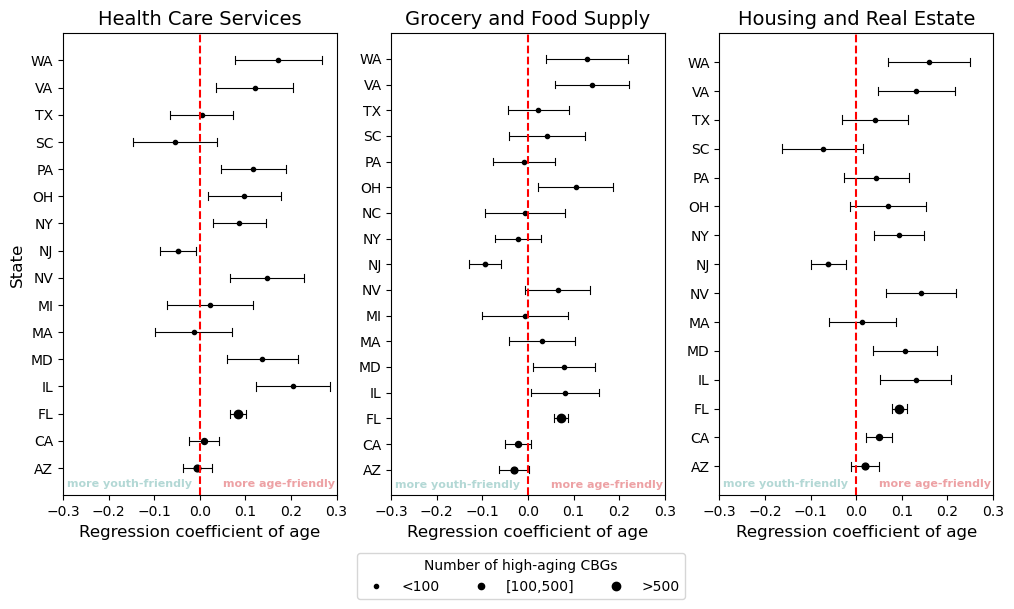

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.lines as mlines

lowOldNum=30
fig,ax=plt.subplots(1,3,figsize=(12,6))

colors={'less than or equal to 0.5':'#B3D8D5','greater than 0.5': '#EDA1A4'}

listHGH=['Health Care Services',
                 'Grocery and Food Supply',
                 'Housing and Real Estate']
dfHomoRegResultPa=pd.read_csv('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/stateLevelRegression/HomoRegResult_with_CI.csv')    
for k,key in enumerate(listHGH): 
    df=dfHomoRegResultPa[(dfHomoRegResultPa['num_old_obs']>=lowOldNum)&(dfHomoRegResultPa['ParentType']==key)]

    states=list(df['state'])
    means=list(df['coeff_regC_4_ctrls'])
    lowers=list(df['coeff_lowci'])
    uppers=list(df['coeff_upperci'])


    p0=np.log( 100 )
    p1=np.log( 500 )
    
    s0=0.3
    s1=0.6
    
    # 绘制点
    for i in range(len(means)):
        
        noc=df[df['state']==states[i]]['num_old_obs'].iat[0]
        if noc<100:
            size=0.3
        elif noc<500:

            p=np.log(df[df['state']==states[i]]['num_old_obs'].iat[0])
            size=s0+(p-p0)*(s1-s0)/(p1-p0)
        else:
            size=0.6

        ax[k].plot(means[i], i, marker='o', color='black', markersize=size*10,linestyle='None')
    # 绘制水平线
    for i in range(len(means)):
        ax[k].hlines(i, lowers[i], uppers[i], colors='black',linewidth=0.8 ,linestyles='-')
        ax[k].plot([lowers[i],lowers[i]],[i-0.15,i+0.15],linewidth=0.8,color='black')
        ax[k].plot([uppers[i],uppers[i]],[i-0.15,i+0.15],linewidth=0.8,color='black')
    # 添加垂直线
    ax[k].axvline(x=0, color='red', linestyle='--')
    # 设置轴标签和标题
    ax[k].set_xlabel('Regression coefficient of age',fontsize=12)
    if k<1:
        ax[k].set_ylabel('State',fontsize=12)
        
    else:
        ax[k].set_ylabel('')
        

    ax[k].text(0.05,-0.7,'more age-friendly',fontsize=8,color=colors['greater than 0.5'], fontweight='bold')#'
    ax[k].text(-0.292,-0.7,'more youth-friendly',fontsize=8,color=colors['less than or equal to 0.5'], fontweight='bold')#'
        
    ax[k].set_title(key,fontsize=14)
    # 调整轴范围
    ax[k].set_xlim([-0.3, 0.3])
    ax[k].set_ylim([-1, len(means)])
    # 添加研究标签
    ax[k].set_yticks(range(len(means)))
    ax[k].set_yticklabels(states)
    ax[k].tick_params(axis='both', which='both', bottom=True, left=True)  # 设置x y轴标签大小
# 显示图形  


# 创建自定义图例元素
circle1 = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', markersize=3, label='older better')
circle2 = mlines.Line2D([], [], color='red', marker='o', linestyle='None', markersize=3, label='more or less the same')
circle3 = mlines.Line2D([], [], color='green', marker='o', linestyle='None', markersize=3, label='younger better')

circle4 = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=3, label='<100')
circle5 = mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=4.5, label='[100,500]')
circle6= mlines.Line2D([], [], color='black', marker='o', linestyle='None', markersize=6, label='>500')
# 添加图例并指定自定义图例元素
plt.legend(handles=[circle4,circle5,circle6],ncol=3,bbox_to_anchor=(-0.1,-0.11),title='Number of high-aging CBGs',frameon=True)

plt.show()


In [76]:
fig.savefig('D:/main/1_research/P10_Mobility/p10_aging mobility/results_all_states/allStatesByParentType/stateLevelRegression/{}.png'.format('HGH_accratio_regression_numoldcbg30'),dpi=600,
           bbox_inches='tight')